# Import packages

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Import the dataframe

In [57]:
# Import the dataframe
df: pd.DataFrame = pd.read_csv('Datasets/cleaned_data.csv')

# Change the Dtype of all the date to DateType instead of an object
df['datum'] = pd.to_datetime(df['datum'])
df['geboortedatum'] = pd.to_datetime(df['geboortedatum'], dayfirst=True)
df['startdatum'] = pd.to_datetime(df['startdatum'])
df['einddatum'] = pd.to_datetime(df['einddatum'])

# Feature engineering

## Create new dummies

In [58]:
df: pd.DataFrame = pd.get_dummies(df, columns=['afdeling'])
df = pd.get_dummies(df, columns=['business_unit'])
df = pd.get_dummies(df, columns=['uitdienst_reden'])
dummy_row_gender = pd.get_dummies(df['geslacht'], prefix='geslacht_id')
df = pd.concat([df, dummy_row_gender], axis=1)

## Visualisation with dummies

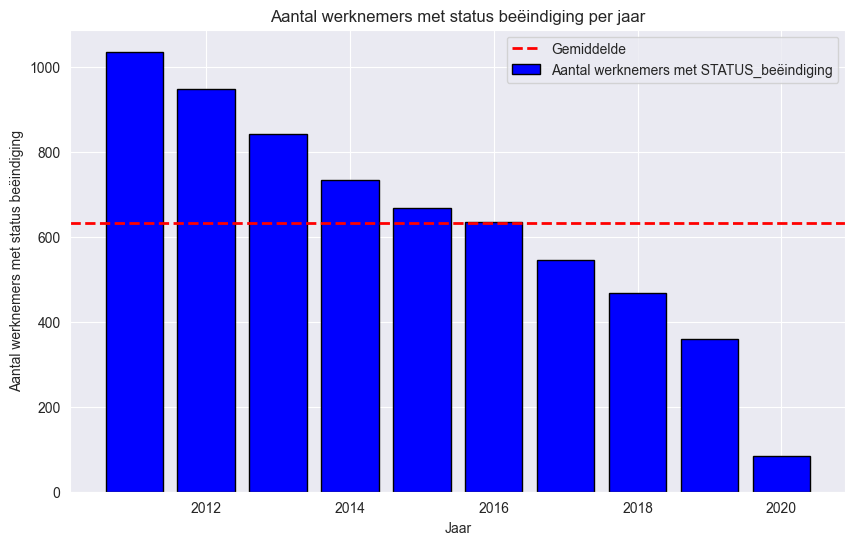

In [59]:
#Histogram van het aantal werknemers met STATUS beëindiging per jaar
df_beindigd = df[df['status_beëindigd'] == 1]

plt.figure(figsize=(10, 6))
plt.bar(df_beindigd['status_jaar'].value_counts().index, df_beindigd['status_jaar'].value_counts().values, color='blue', edgecolor='black', label='Aantal werknemers met STATUS_beëindiging')
plt.axhline(y=df_beindigd['status_jaar'].value_counts().mean(), color='red', linestyle='dashed', linewidth=2, label='Gemiddelde')

plt.xlabel('Jaar')
plt.ylabel('Aantal werknemers met status beëindiging')
plt.title('Aantal werknemers met status beëindiging per jaar')
plt.legend()
plt.show()

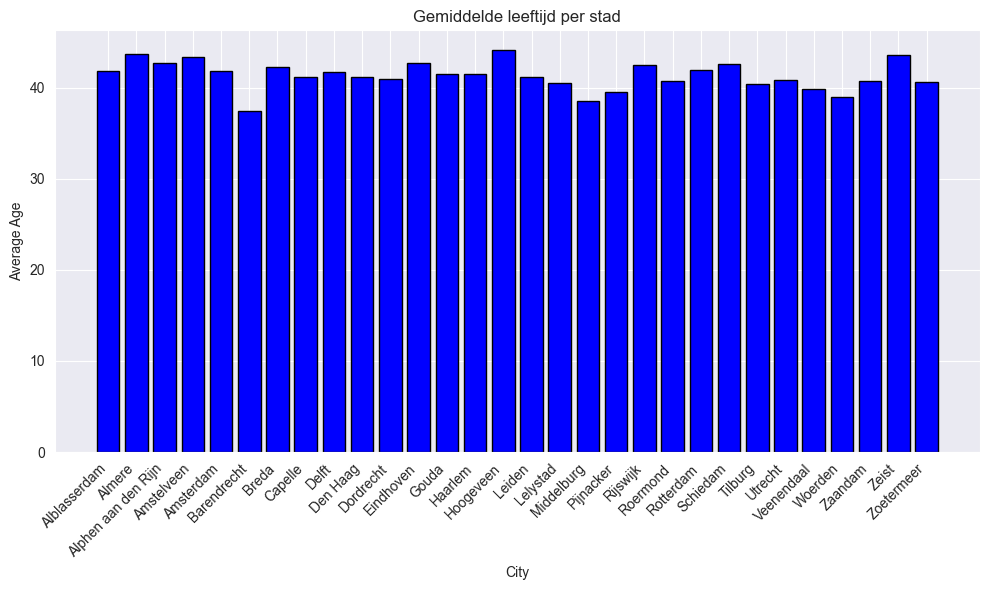

In [60]:
# Create a graph with the average age per city, to check for age distribution
average_age_per_city = df.groupby('stad')['leeftijd'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_age_per_city['stad'], average_age_per_city['leeftijd'], color='blue', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Average Age')
plt.title('Gemiddelde leeftijd per stad')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

/var/folders/h6/jcdx533j7414r00pkwz6gynr0000gn/T/ipykernel_11519/4254562590.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x='stad', y='Count', hue='Reason', data=melted_reasons, color='blue', edgecolor='black')


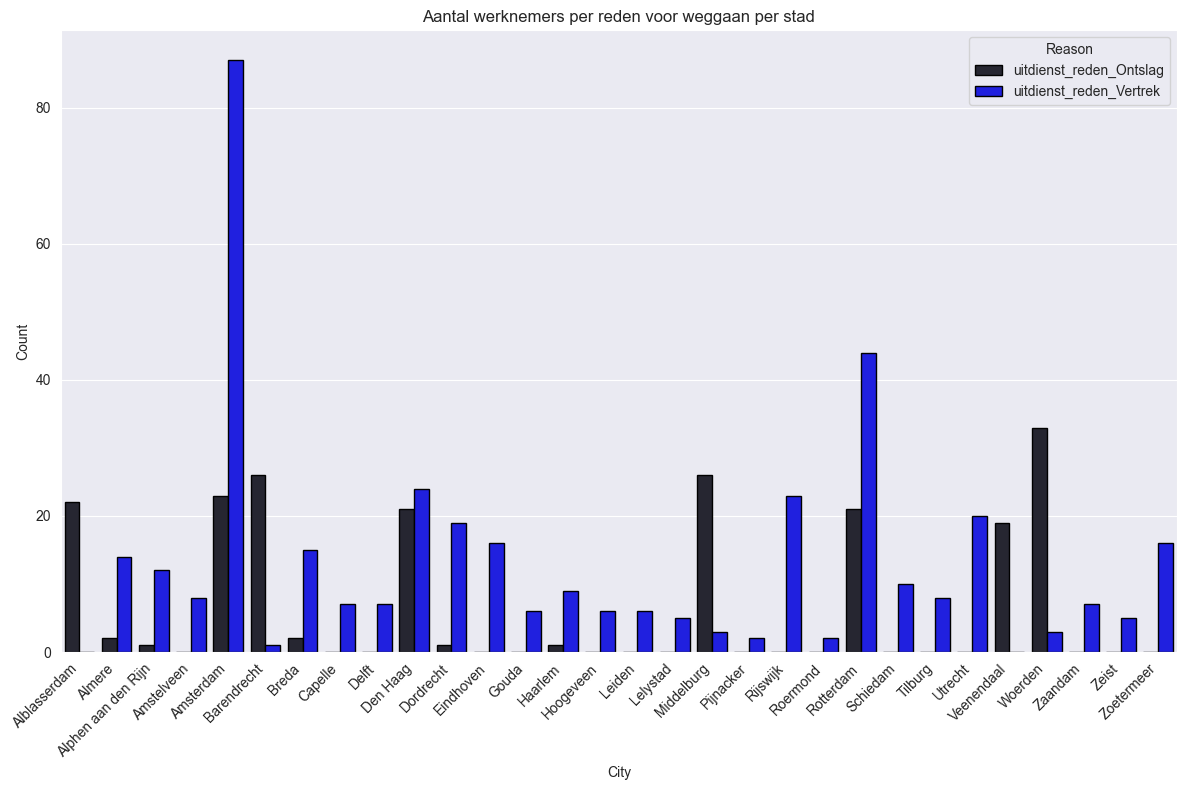

In [61]:
# Om te onderzoeken in welke steden er veel uitstroom van werknemers is maken we deze plot
reasons_df = df[['stad', 'uitdienst_reden_Ontslag', 'uitdienst_reden_Vertrek']]

reasons_df = reasons_df.fillna(0)
reasons_count_per_city = reasons_df.groupby('stad').sum().reset_index()
melted_reasons = pd.melt(reasons_count_per_city, id_vars='stad', var_name='Reason', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='stad', y='Count', hue='Reason', data=melted_reasons, color='blue', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Aantal werknemers per reden voor weggaan per stad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

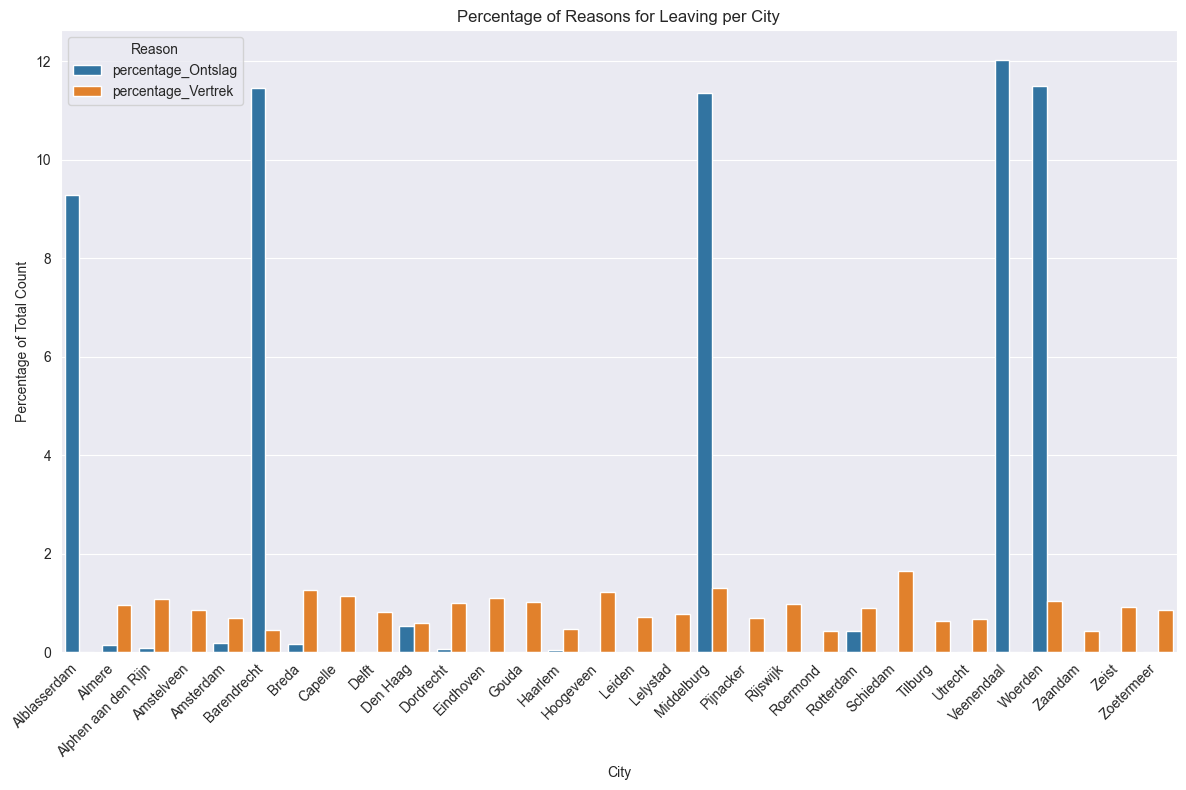

In [62]:
reasons_df = df[['stad', 'uitdienst_reden_Ontslag', 'uitdienst_reden_Vertrek']]
reasons_df = reasons_df.fillna(0)
reasons_count_per_city = reasons_df.groupby('stad').sum().reset_index()

total_count_per_city = df['stad'].value_counts().reset_index()
total_count_per_city.columns = ['stad', 'total_count']

merged_df = pd.merge(reasons_count_per_city, total_count_per_city, on='stad')
merged_df['percentage_Ontslag'] = (merged_df['uitdienst_reden_Ontslag'] / merged_df['total_count']) * 100
merged_df['percentage_Vertrek'] = (merged_df['uitdienst_reden_Vertrek'] / merged_df['total_count']) * 100

melted_reasons = pd.melt(merged_df, id_vars='stad', var_name='Reason', value_name='Percentage')
melted_reasons = melted_reasons[melted_reasons['Reason'].isin(['percentage_Ontslag', 'percentage_Vertrek'])]

plt.figure(figsize=(12, 8))
sns.barplot(x='stad', y='Percentage', hue='Reason', data=melted_reasons)
plt.xlabel('City')
plt.ylabel('Percentage of Total Count')
plt.title('Percentage of Reasons for Leaving per City')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

plt.show()

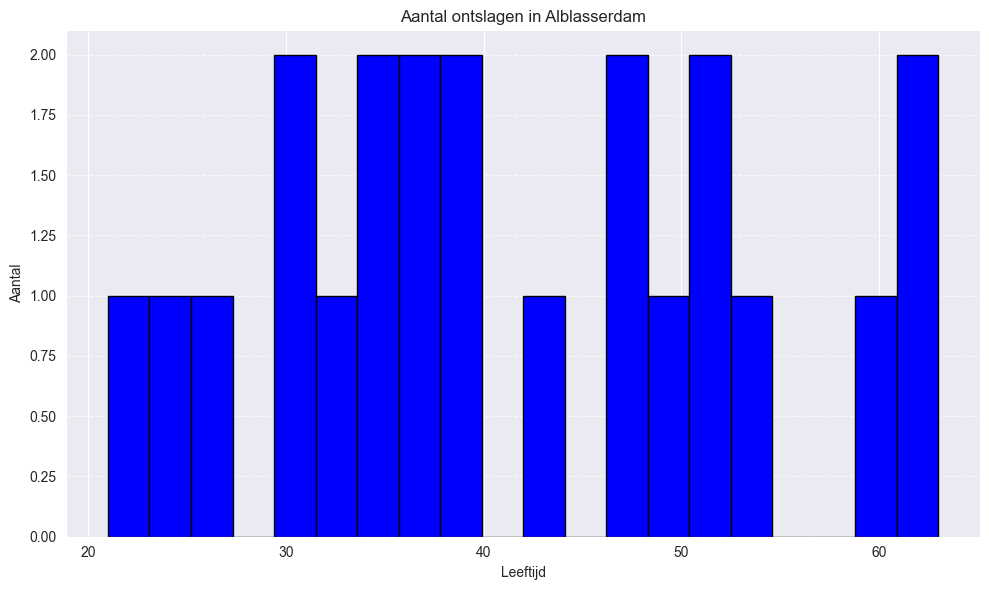

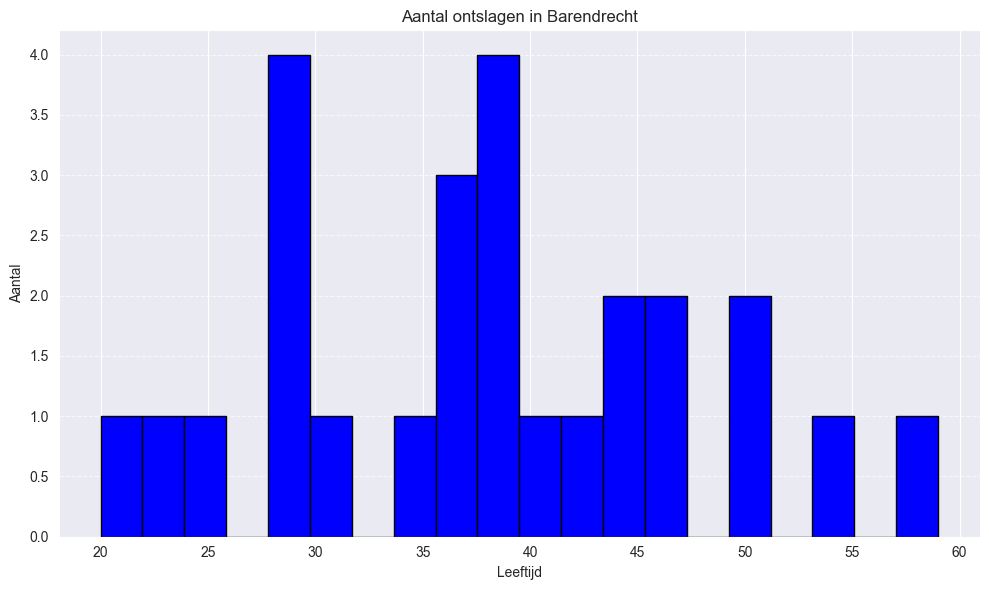

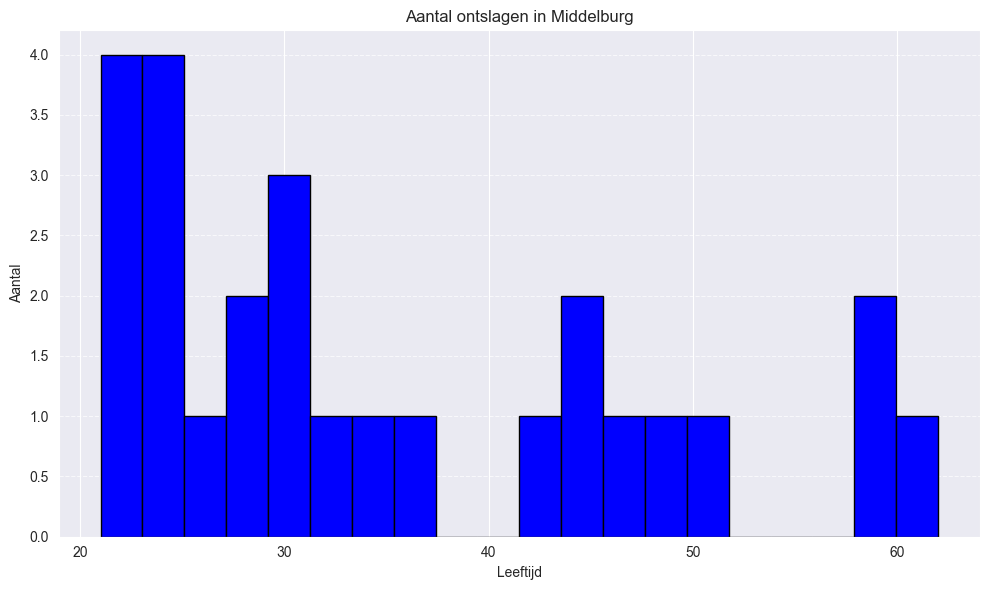

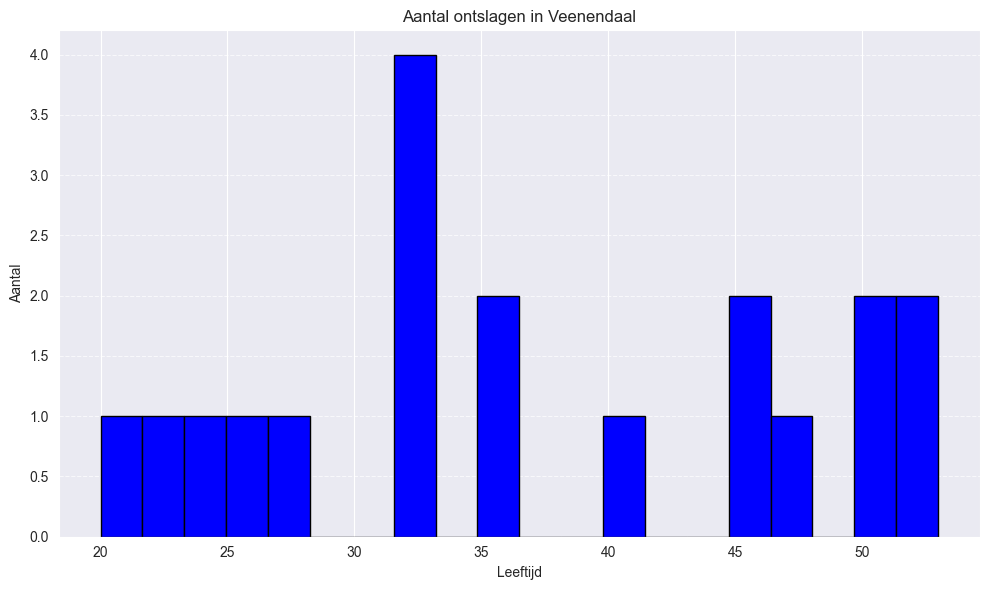

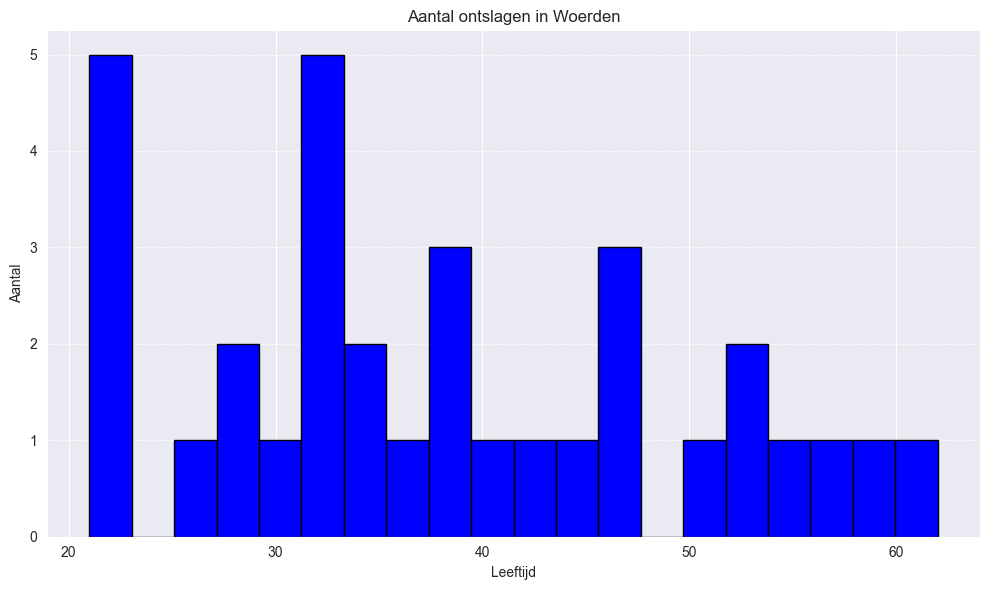

In [63]:
# To check what the age distribution is per city
cities_to_plot: list[str] = ['Alblasserdam', 'Barendrecht', 'Middelburg', 'Veenendaal', 'Woerden']

for city in cities_to_plot:
    filtered_df = df[(df['uitdienst_reden_Ontslag'] == 1) & (df['stad'] == city)]

    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['leeftijd'], bins=20, color='blue', edgecolor='black')
    plt.xlabel('Leeftijd')
    plt.ylabel('Aantal')
    plt.title(f'Aantal ontslagen in {city}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

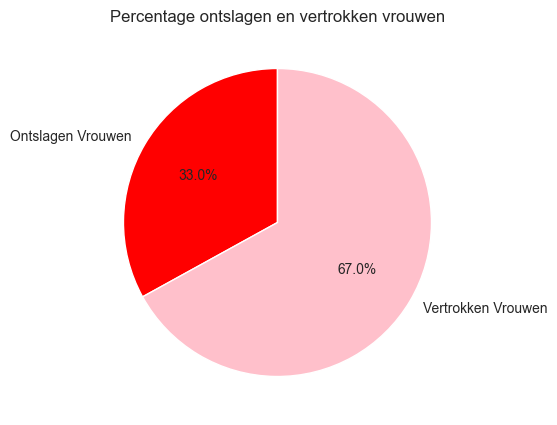

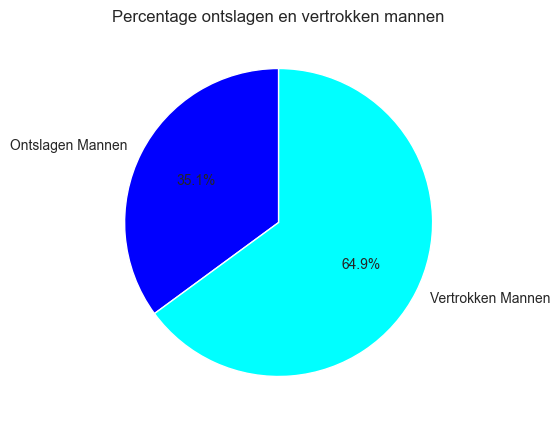

In [64]:
# Percentage of men and women fired 

percentage_ontslagen_mannen = (df[df['geslacht_id_Man'] == 1]['uitdienst_reden_Ontslag'].sum() / len(df[df['geslacht_id_Man'] == 1])) * 100
percentage_vertrokken_mannen = (df[df['geslacht_id_Man'] == 1]['uitdienst_reden_Vertrek'].sum() / len(df[df['geslacht_id_Man'] == 1])) * 100

percentage_ontslagen_vrouwen = (df[df['geslacht_id_Vrouw'] == 1]['uitdienst_reden_Ontslag'].sum() / len(df[df['geslacht_id_Vrouw'] == 1])) * 100
percentage_vertrokken_vrouwen = (df[df['geslacht_id_Vrouw'] == 1]['uitdienst_reden_Vertrek'].sum() / len(df[df['geslacht_id_Vrouw'] == 1])) * 100

plt.figure(figsize=(10, 5))
labels = ['Ontslagen Vrouwen', 'Vertrokken Vrouwen']
sizes = [percentage_ontslagen_vrouwen, percentage_vertrokken_vrouwen]
colors = ['red', 'pink']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage ontslagen en vertrokken vrouwen')
plt.show()

plt.figure(figsize=(10, 5))
labels = ['Ontslagen Mannen', 'Vertrokken Mannen']
sizes = [percentage_ontslagen_mannen, percentage_vertrokken_mannen]
colors = ['blue', 'cyan']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage ontslagen en vertrokken mannen')
plt.show()

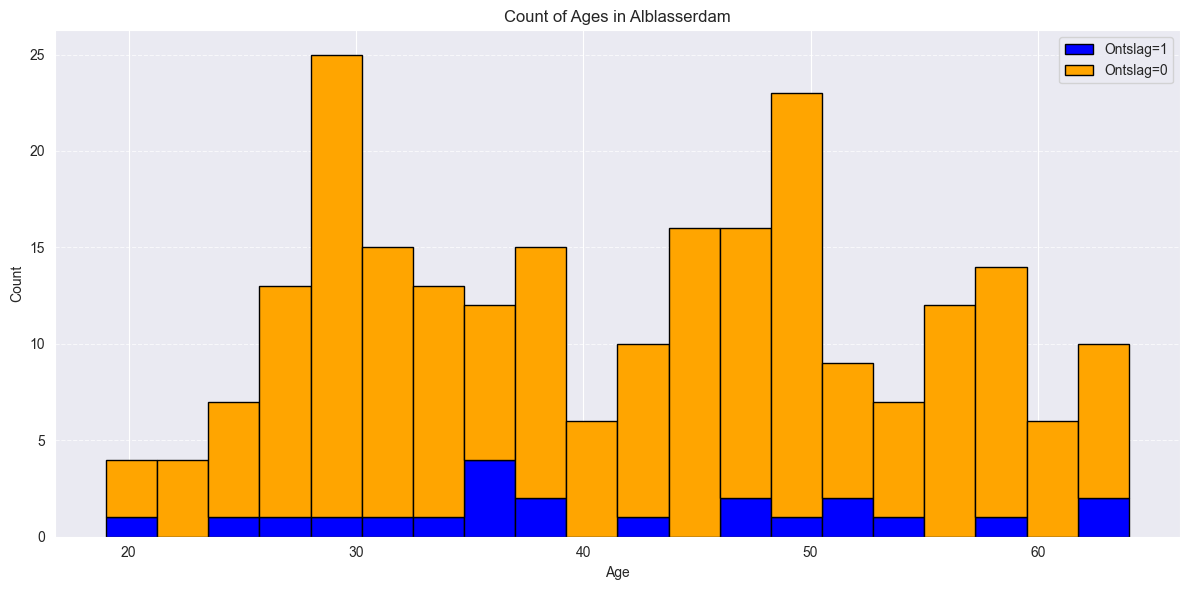

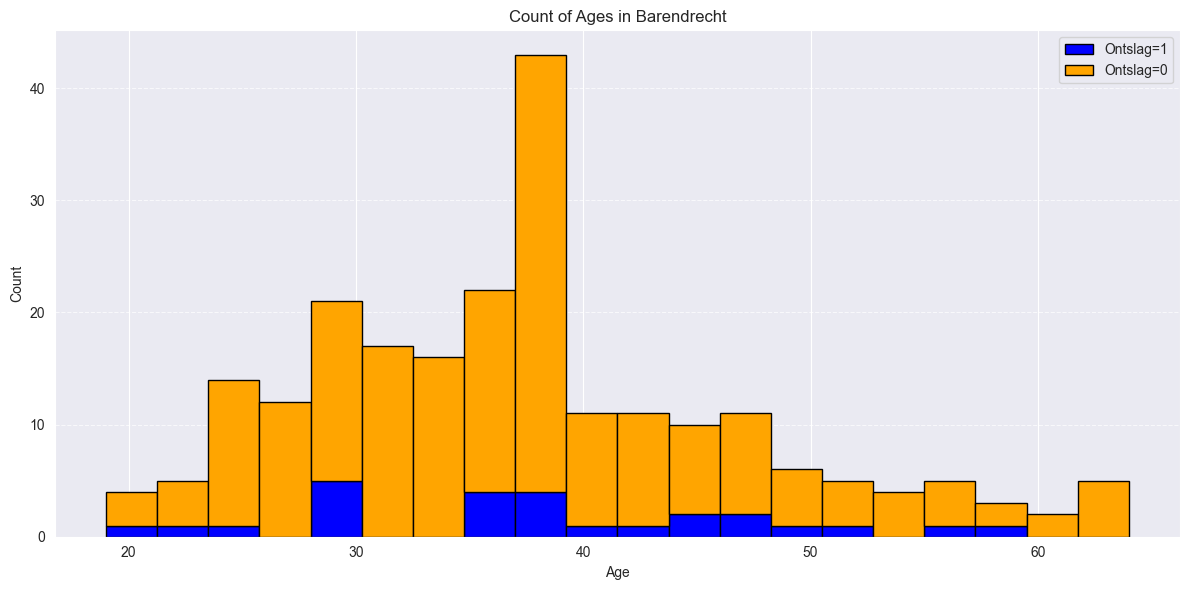

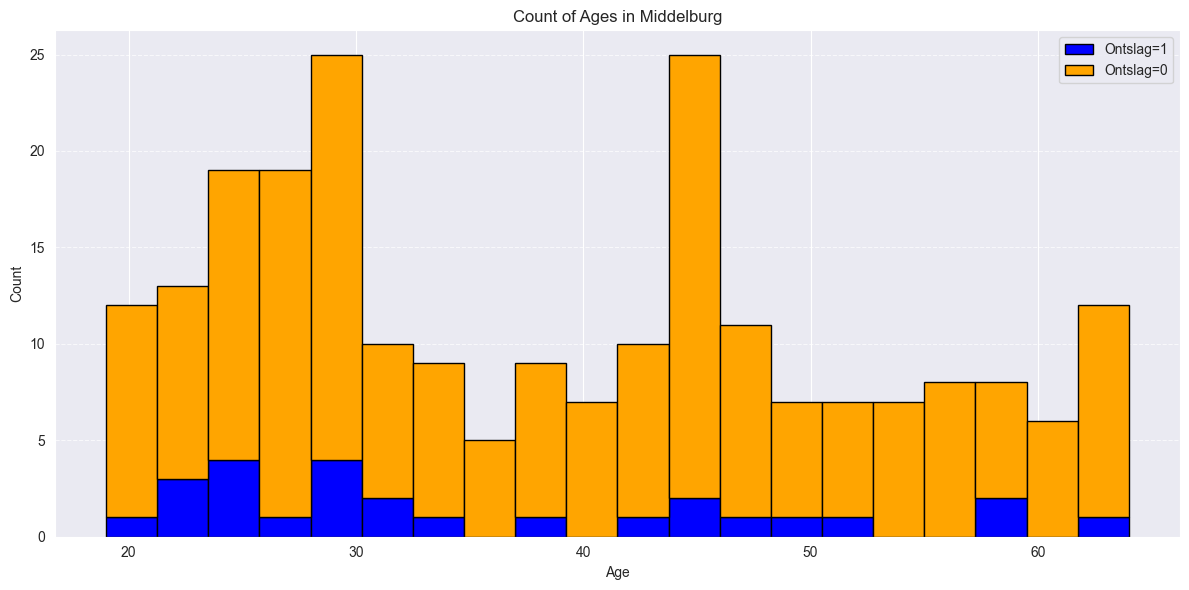

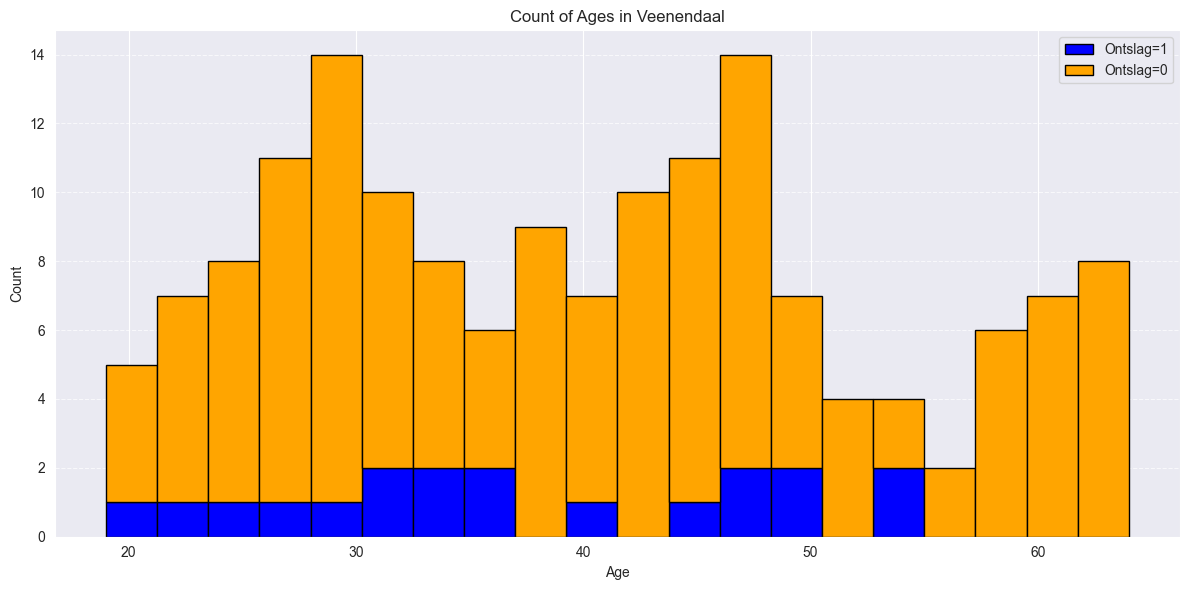

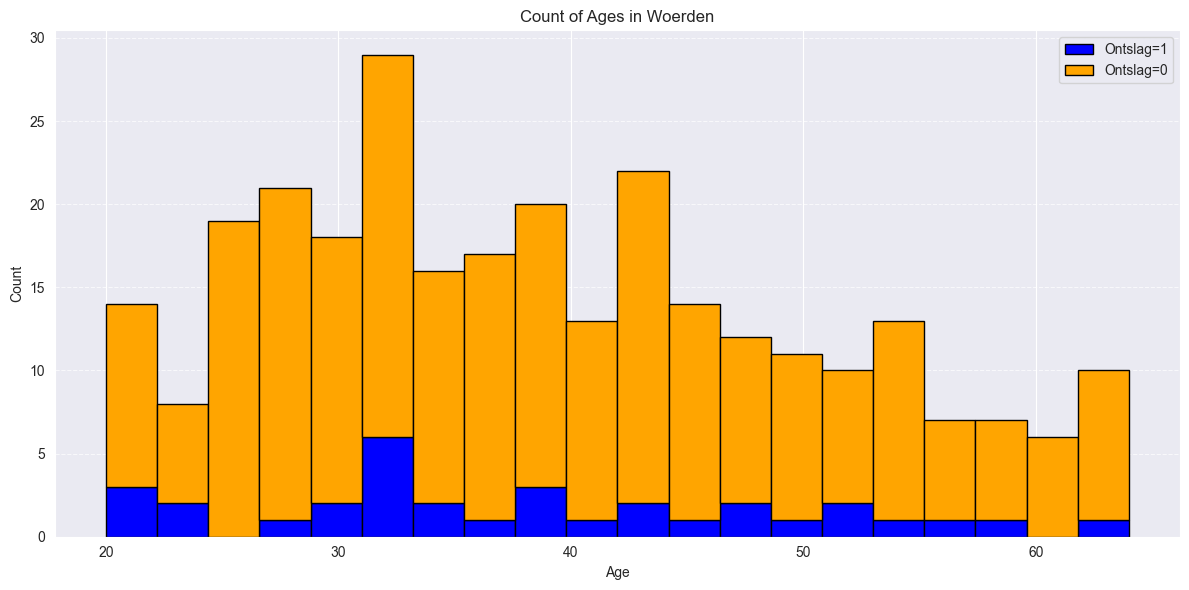

In [65]:
cities_to_plot = ['Alblasserdam', 'Barendrecht', 'Middelburg', 'Veenendaal', 'Woerden']

for city in cities_to_plot:
    df_city = df[df['stad'] == city]

    count_ontslag_1 = df_city[df_city['uitdienst_reden_Ontslag'] == 1]['leeftijd']
    count_ontslag_0 = df_city[df_city['uitdienst_reden_Ontslag'] == 0]['leeftijd']

    plt.figure(figsize=(12, 6))

    plt.hist([count_ontslag_1, count_ontslag_0], bins=20, stacked=True, color=['blue', 'orange'], edgecolor='black', label=['Ontslag=1', 'Ontslag=0'])
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title(f'Count of Ages in {city}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

In [66]:
# Get the average travel distance to the three biggest cities
#Een nieuwe column waarin staat wat de afstand tot amsterdam is van de steden
coordinates = {
    'Amstelveen': (52.3121, 4.8704),
    'Utrecht': (52.0907, 5.1214),
    'Amsterdam': (52.3676, 4.9041),
    'Den Haag': (52.0705, 4.3007),
    'Leiden': (52.1601, 4.4970),
    'Dordrecht': (51.8133, 4.6901),
    'Barendrecht': (51.8530, 4.5343),
    'Eindhoven': (51.4416, 5.4697),
    'Breda': (51.5719, 4.7683),
    'Tilburg': (51.5555, 5.0913),
    'Rotterdam': (51.9225, 4.4792),
    'Rijswijk': (52.0377, 4.3214),
    'Haarlem': (52.3874, 4.6462),
    'Zaandam': (52.4387, 4.8183),
    'Gouda': (52.0116, 4.7104),
    'Schiedam': (51.9194, 4.3883),
    'Zeist': (52.0907, 5.1804),
    'Middelburg': (51.4988, 3.6100),
    'Almere': (52.3508, 5.2647),
    'Zoetermeer': (52.0571, 4.4936),
    'Veenendaal': (52.0289, 5.5580),
    'Delft': (52.0116, 4.3571),
    'Hoogeveen': (52.7227, 6.4901),
    'Lelystad': (52.5185, 5.4714),
    'Roermond': (51.1942, 5.9871),
    'Alphen aan den Rijn': (52.1277, 4.6575),
    'Capelle': (51.9304, 4.5809),
    'Pijnacker': (52.0153, 4.4255),
    'Alblasserdam': (51.8625, 4.6600),
    'Woerden': (52.0848, 4.8835)
}

def calculate_distance(lat1, lon1, lat2, lon2) -> float:
    R: int = 6371 

    d_lat: float = math.radians(lat2 - lat1)
    d_lon: float = math.radians(lon2 - lon1)

    a: float = math.sin(d_lat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(d_lon / 2) ** 2
    c: float = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance: float = R * c
    return distance

# amsterdam_lat, amsterdam_lon = 52.3676, 4.9041

def calculate_distance_city(city_coordinates):
    distances: list [float] = []
    for index, row in df.iterrows():
        city_name = row['stad']
        if city_name in coordinates:
            city_lat, city_lon = coordinates[city_name]
            distance = calculate_distance(city_coordinates[0], city_coordinates[1], city_lat, city_lon)
            distances.append(distance)
        else:
            distances.append('Onbekend') 
            print(f"Coordinates not found for city: {city_name}") 
    return distances

def get_average_distance() -> list:
    amsterdam = calculate_distance_city(coordinates['Amsterdam'])
    utrecht = calculate_distance_city(coordinates['Utrecht'])
    rotterdam = calculate_distance_city(coordinates['Rotterdam'])
    
    averge_distance = [int(amsterdam[i] + utrecht[i] + rotterdam[i] / 3) for i in range(len(amsterdam))]
    return averge_distance

df['reisafstand'] = get_average_distance()

In [67]:
# Read in a dataframe which contains the birth in the Netherlands
birth_df = pd.read_csv('Datasets/geboortecijfers_2022.csv', sep=';', decimal=',')

# Replace city names for cities to match our dataset
birth_df.replace('Pijnacker-Nootdorp', 'Pijnacker', inplace=True)
birth_df.replace('s-Gravenhage', 'Den Haag', inplace=True)
birth_df.replace('Zaanstad', 'Zaandam', inplace=True)
birth_df.replace('Capelle aan den IJssel', 'Capelle', inplace=True)

# Merge the two datasets
merged_df = df.merge(birth_df, left_on='stad', right_on='Gemeente', how='left')

# Add the required columns to out dataset
df['aantal_geboortes'] = merged_df['Levend geborenen per duizend inwoners']
df['aantal_geboortes_pf'] = merged_df["Levend geborenen per duizend vrouwen (15 tot 50 jaar)"]

# Store the Dataframe 

In [68]:
# Only get the data where the worker does not work anymore 
df = df[df['status_beëindigd'] == True]

# Add a new column to get the starting age of a worker
df['leeftijd_begin_dienst'] = df['leeftijd'] - df['dienstperiode']

# Save the dataset into a new csv file
df.to_csv('Datasets/trainingdata.csv', sep=',', index=False)